# Analysis of European Soccer Database

Erick Herrera, Hyejeong Kim, Kibreab Gebrehiwot

## Introduction

The data on European football, which is loved by people all over the world, is a very attractive for analysis for one soccer fan. This data set has the information of total 11 different European football league. This data consists of total 7 tables having Country, League, Player, their attributes, team, their attributes and all matches played 2008 - 2016.  
^ Exploratory analysis & Data visualization
1. which team had highest goal per year?
2. who made highest goal per year?
3. which team won the most per year?
4. what attributes of the team is most important factor to lead the success?
5. foot(right/left) vs shot_power or long_shots, or strength
6. Who is the most attributed player?
7. goal vs home or away 
8. highest goal vs highest won
^ Analysis
** relationship winning possibility(team) according to home or away(logistic regression)
** overall_rating(player) as dependent and other features for independent(linear regression)
** winning percentage(team) as dependent and other features for independent(linear regression)

*** connection player and team

# Collect Data

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import sqlite3

In [2]:
sqlite_file = 'database.sqlite'

In [3]:
conn = sqlite3.connect(sqlite_file)

In [4]:
query = "SELECT * FROM Country"
countries = pd.read_sql(query, conn)
countries.head()

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [5]:
countries.shape

(11, 2)

In [6]:
query = "SELECT * FROM League"
leagues = pd.read_sql(query, conn)
leagues.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [7]:
leagues.shape

(11, 3)

In [8]:
query = "SELECT * FROM Match"
matches = pd.read_sql(query, conn)
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
matches.shape

(25979, 115)

In [10]:
my_list = list(matches)
my_list = matches.columns.values.tolist()
# my_list

In [11]:
query = "SELECT * FROM Player"
players = pd.read_sql(query, conn)
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [12]:
players.shape

(11060, 7)

In [13]:
players.columns

Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')

In [14]:
query = "SELECT * FROM Player_Attributes"
player_Attributes = pd.read_sql(query, conn)
player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [15]:
player_Attributes.shape

(183978, 42)

In [16]:
player_Attributes.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [17]:
query = "SELECT * FROM Team"
teams = pd.read_sql(query, conn)
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [18]:
teams.shape

(299, 5)

In [19]:
query = "SELECT * FROM Team_Attributes"
team_Attributes = pd.read_sql(query, conn)
team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [20]:
team_Attributes.shape

(1458, 25)

In [21]:
team_Attributes.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass',
       'defenceDefenderLineClass'],
      dtype='object')

# Data Processing

Need to merge country and league, player and player_attributes, team and team_attributes
remove nan
change to datetime birthday of player

In [22]:
cursor = conn.cursor()

#### Cleaning Country and League Table
Country and League Table merged to countryLeague table

In [23]:
result = cursor.execute("""SELECT Country.id, Country.name, League.name FROM Country INNER JOIN
League ON Country.ID = League.ID""")

In [24]:
countryLeague = pd.DataFrame(result.fetchall())
countryLeague.columns = ['id', 'countryName', 'leagueName']
countryLeague.head()

,id,countryName,leagueName
0,1,Belgium,Belgium Jupiler League
1,1729,England,England Premier League
2,4769,France,France Ligue 1
3,7809,Germany,Germany 1. Bundesliga
4,10257,Italy,Italy Serie A


#### Cleaning Matches Table
Remove nan columns and split season column to season_start and season_end.
Matches and countryLeague merged to matchCountry table 

In [25]:
matches.dropna(axis = 1, inplace = True)
matches.isnull().values.any()

False

In [26]:
matches['date'] = pd.to_datetime(matches['date'])
matches.dtypes

id                           int64
country_id                   int64
league_id                    int64
season                      object
stage                        int64
date                datetime64[ns]
match_api_id                 int64
home_team_api_id             int64
away_team_api_id             int64
home_team_goal               int64
away_team_goal               int64
dtype: object

In [27]:
matches['season_start'] = matches['season'].apply(lambda x: x.split('/')[0])
matches['season_end'] = matches['season'].apply(lambda x: x.split('/')[1])
matches.drop(columns = ['season'], axis = 1, inplace = True)
matches.head()

,id,country_id,league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_start,season_end
0,1,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009
1,2,1,1,1,2008-08-16,492474,10000,9994,0,0,2008,2009
2,3,1,1,1,2008-08-16,492475,9984,8635,0,3,2008,2009
3,4,1,1,1,2008-08-17,492476,9991,9998,5,0,2008,2009
4,5,1,1,1,2008-08-16,492477,7947,9985,1,3,2008,2009


In [28]:
matchCountry = matches.merge(countryLeague, left_on = 'country_id', right_on = 'id')
matchCountry.drop(columns = ['league_id', 'id_y'], axis = 1, inplace = True)
matchCountry = matchCountry.rename(columns={"id_x": "id", "country_id": "country_league_id"})
matchCountry.head()

,id,country_league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_start,season_end,countryName,leagueName
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium,Belgium Jupiler League
1,2,1,1,2008-08-16,492474,10000,9994,0,0,2008,2009,Belgium,Belgium Jupiler League
2,3,1,1,2008-08-16,492475,9984,8635,0,3,2008,2009,Belgium,Belgium Jupiler League
3,4,1,1,2008-08-17,492476,9991,9998,5,0,2008,2009,Belgium,Belgium Jupiler League
4,5,1,1,2008-08-16,492477,7947,9985,1,3,2008,2009,Belgium,Belgium Jupiler League


#### Cleaning Player and Player_Attributes
Player and Player_Attribute merged to player_attribute.
Not sure which column need to be deleted from the table. 

In [29]:
players['birthday'] = pd.to_datetime(players['birthday'])

In [30]:
player_Attributes['date'] = pd.to_datetime(player_Attributes['date'])

In [31]:
player_attribute = players.merge(player_Attributes, left_on = 'player_api_id', right_on = 'player_api_id')
player_attribute.drop(columns = ['id_y', 'player_fifa_api_id_y'], axis = 1, inplace = True)
player_attribute = player_attribute.rename(columns={"id_x": "id", "player_fifa_api_id_x": "player_fifa_api_id"})
player_attribute.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,date,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2016-02-18,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2015-11-19,67.0,71.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2015-09-21,62.0,66.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2015-03-20,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,2007-02-22,61.0,65.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


#### Cleaning Team, Match and Team_Attributes
1. Team and Match merged to team_match table 

In [32]:
team_Attributes['date'] = pd.to_datetime(team_Attributes['date'])

In [33]:
team_match = matchCountry.merge(teams, left_on = 'home_team_api_id', right_on = 'team_api_id')
team_match = team_match.rename(columns={"id_x": "id", "team_long_name": "home_team", "team_fifa_api_id": "home_team_fifa_api_id"})
team_match['home_team'] =  team_match['home_team'] + " (" + team_match['team_short_name'] + ")"
team_match.drop(columns = ['id_y', 'team_api_id', 'team_short_name'], axis = 1, inplace = True)

team_match = team_match.merge(teams, left_on = 'away_team_api_id', right_on = 'team_api_id')
team_match = team_match.rename(columns={"id_x": "id", "team_long_name": "away_team", "team_fifa_api_id": "away_team_fifa_api_id"})
team_match['away_team'] =  team_match['away_team'] + " (" + team_match['team_short_name'] + ")"
team_match.drop(columns = ['id_y', 'team_api_id', 'team_short_name'], axis = 1, inplace = True)
team_match.head()

,id,country_league_id,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,season_start,season_end,countryName,leagueName,home_team_fifa_api_id,home_team,away_team_fifa_api_id,away_team
0,1,1,1,2008-08-17,492473,9987,9993,1,1,2008,2009,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
1,483,1,5,2009-08-30,665353,9987,9993,1,1,2009,2010,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
2,524,1,1,2010-08-01,838476,9987,9993,2,1,2010,2011,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
3,759,1,1,2011-07-30,1032694,9987,9993,3,1,2011,2012,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)
4,1014,1,11,2012-10-20,1224064,9987,9993,3,0,2012,2013,Belgium,Belgium Jupiler League,673.0,KRC Genk (GEN),675.0,Beerschot AC (BAC)


In [34]:
team_match.columns
team_match = team_match[['id', 'match_api_id', 'date', 'home_team', 'home_team_api_id', 'home_team_fifa_api_id', 
                         'home_team_goal', 'away_team', 'away_team_api_id', 'away_team_fifa_api_id', 'away_team_goal', 
                         'country_league_id', 'stage', 'season_start', 'season_end', 'countryName', 'leagueName']]
team_match.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_fifa_api_id,home_team_goal,away_team,away_team_api_id,away_team_fifa_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName
0,1,492473,2008-08-17,KRC Genk (GEN),9987,673.0,1,Beerschot AC (BAC),9993,675.0,1,1,1,2008,2009,Belgium,Belgium Jupiler League
1,483,665353,2009-08-30,KRC Genk (GEN),9987,673.0,1,Beerschot AC (BAC),9993,675.0,1,1,5,2009,2010,Belgium,Belgium Jupiler League
2,524,838476,2010-08-01,KRC Genk (GEN),9987,673.0,2,Beerschot AC (BAC),9993,675.0,1,1,1,2010,2011,Belgium,Belgium Jupiler League
3,759,1032694,2011-07-30,KRC Genk (GEN),9987,673.0,3,Beerschot AC (BAC),9993,675.0,1,1,1,2011,2012,Belgium,Belgium Jupiler League
4,1014,1224064,2012-10-20,KRC Genk (GEN),9987,673.0,3,Beerschot AC (BAC),9993,675.0,0,1,11,2012,2013,Belgium,Belgium Jupiler League


In [35]:
winner = []
for index, row in team_match.iterrows():
    if team_match.iloc[index, 6] > team_match.iloc[index, 10]:
        winner.append(team_match.iloc[index, 3])
    elif team_match.iloc[index, 6] < team_match.iloc[index, 10]:
        winner.append(team_match.iloc[index, 7])
    else:
        winner.append("Tie")
team_match['winner'] = winner 

In [36]:
team_match.drop(columns = ['home_team_fifa_api_id', 'away_team_fifa_api_id'], axis = 1, inplace = True)
team_match.head()

,id,match_api_id,date,home_team,home_team_api_id,home_team_goal,away_team,away_team_api_id,away_team_goal,country_league_id,stage,season_start,season_end,countryName,leagueName,winner
0,1,492473,2008-08-17,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,1,2008,2009,Belgium,Belgium Jupiler League,Tie
1,483,665353,2009-08-30,KRC Genk (GEN),9987,1,Beerschot AC (BAC),9993,1,1,5,2009,2010,Belgium,Belgium Jupiler League,Tie
2,524,838476,2010-08-01,KRC Genk (GEN),9987,2,Beerschot AC (BAC),9993,1,1,1,2010,2011,Belgium,Belgium Jupiler League,KRC Genk (GEN)
3,759,1032694,2011-07-30,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,1,1,1,2011,2012,Belgium,Belgium Jupiler League,KRC Genk (GEN)
4,1014,1224064,2012-10-20,KRC Genk (GEN),9987,3,Beerschot AC (BAC),9993,0,1,11,2012,2013,Belgium,Belgium Jupiler League,KRC Genk (GEN)


2. Team and Team_Attribute merged to team_attribute

In [37]:
team_attribute = team_Attributes.merge(teams, left_on = 'team_api_id', right_on = 'team_api_id')
team_attribute = team_attribute.rename(columns={"id_x": "id", "team_long_name": "team_name", "team_fifa_api_id_x": "team_fifa_api_id"})
team_attribute['team_name'] =  team_attribute['team_name'] + " (" + team_attribute['team_short_name'] + ")"
team_attribute.drop(columns = ['id_y', 'team_fifa_api_id_y', 'team_short_name'], axis = 1, inplace = True)
team_attribute.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_name
0,1,434,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,...,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau (AAR)
1,2,434,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau (AAR)
2,3,434,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,...,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau (AAR)
3,4,77,8485,2010-02-22,70,Fast,NaN,Little,70,Long,...,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen (ABE)
4,5,77,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,...,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen (ABE)


In [38]:
team_attribute.columns

Index(['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed',
       'buildUpPlaySpeedClass', 'buildUpPlayDribbling',
       'buildUpPlayDribblingClass', 'buildUpPlayPassing',
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass',
       'chanceCreationPassing', 'chanceCreationPassingClass',
       'chanceCreationCrossing', 'chanceCreationCrossingClass',
       'chanceCreationShooting', 'chanceCreationShootingClass',
       'chanceCreationPositioningClass', 'defencePressure',
       'defencePressureClass', 'defenceAggression', 'defenceAggressionClass',
       'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass',
       'team_name'],
      dtype='object')

In [39]:
cols = list(team_attribute.columns)
cols = [cols[0]] + [cols[-1]] + cols[1:-1]

In [40]:
team_attribute = team_attribute[cols]
team_attribute.sort_values(by='team_name', ascending=False)
team_attribute.head()

,id,team_name,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,FC Aarau (AAR),434,9930,2010-02-22,60,Balanced,NaN,Little,50,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,FC Aarau (AAR),434,9930,2014-09-19,52,Balanced,48.0,Normal,56,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,FC Aarau (AAR),434,9930,2015-09-10,47,Balanced,41.0,Normal,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,Aberdeen (ABE),77,8485,2010-02-22,70,Fast,NaN,Little,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,Aberdeen (ABE),77,8485,2011-02-22,47,Balanced,NaN,Little,52,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


# Exploratory analysis & Data visualization

1. which team had highest goal per season?

In [41]:
df = team_match[['season_start', 'home_team', 'home_team_goal', 'away_team', 'away_team_goal']]
df

,season_start,home_team,home_team_goal,away_team,away_team_goal
0,2008,KRC Genk (GEN),1,Beerschot AC (BAC),1
1,2009,KRC Genk (GEN),1,Beerschot AC (BAC),1
2,2010,KRC Genk (GEN),2,Beerschot AC (BAC),1
3,2011,KRC Genk (GEN),3,Beerschot AC (BAC),1
4,2012,KRC Genk (GEN),3,Beerschot AC (BAC),0
...,...,...,...,...,...
25974,2012,FC Lausanne-Sports (LAU),0,Grasshopper Club Zürich (GRA),2
25975,2013,FC Lausanne-Sports (LAU),0,Grasshopper Club Zürich (GRA),2
25976,2013,FC Lausanne-Sports (LAU),0,Grasshopper Club Zürich (GRA),0
25977,2015,Lugano (LUG),4,Grasshopper Club Zürich (GRA),1


In [42]:
a = df[df['season_start'] == '2008']
b = a[a['home_team'] == 'AC Bellinzona (BEL)']
b['home_team_goal'].sum()

29

In [43]:
a = df[df['season_start'] == '2008']
b = a[a['away_team'] == 'AC Bellinzona (BEL)']
b['away_team_goal'].sum()

15

In [44]:
num_goal_home = df.groupby(['season_start', 'home_team']).sum()
num_goal_home.drop(columns = ['away_team_goal'], axis = 1, inplace = True)
num_goal_home.head()

home_team_goal
season_start home_team                          
2008         1. FC Köln (FCK)                 14
             AC Bellinzona (BEL)              29
             ADO Den Haag (HAA)               21
             AJ Auxerre (AUX)                 18
             AS Monaco (MON)                  26

In [45]:
num_goal_away = df.groupby(['season_start', 'away_team']).sum()
num_goal_away.drop(columns = ['home_team_goal'], axis = 1, inplace = True)
num_goal_away.head()

away_team_goal
season_start away_team                          
2008         1. FC Köln (FCK)                 21
             AC Bellinzona (BEL)              15
             ADO Den Haag (HAA)               20
             AJ Auxerre (AUX)                 17
             AS Monaco (MON)                  15

In [46]:
num_goal = num_goal_home.merge(num_goal_away, left_index=True, right_on=['season_start', 'away_team'])
num_goal['total_num_goal'] = num_goal['home_team_goal'] + num_goal['away_team_goal']
num_goal

home_team_goal  away_team_goal  \
season_start away_team                                               
2008         1. FC Köln (FCK)                   14              21   
             AC Bellinzona (BEL)                29              15   
             ADO Den Haag (HAA)                 21              20   
             AJ Auxerre (AUX)                   18              17   
             AS Monaco (MON)                    26              15   
...                                            ...             ...   
2015         West Ham United (WHU)              34              31   
             Willem II (WII)                    19              16   
             Wisła Kraków (WIS)                 20              25   
             Zagłębie Lubin (ZAG)               23              18   
             Śląsk Wrocław (SLA)                14              14   

                                    total_num_goal  
season_start away_team                              
2008         1. FC Köln (FCK)                   35  
             AC Bellinzona (BEL)                44  
             ADO Den Haag (HAA)                 41  
             AJ Auxerre (AUX)                   35  
             AS Monaco (MON)                    41  
...                                            ...  
2015         West Ham United (WHU)              65  
             Willem II (WII)                    35  
             Wisła Kraków (WIS)                 45  
             Zagłębie Lubin (ZAG)               41  
             Śląsk Wrocław (SLA)                28  

[1481 rows x 3 columns]

In [47]:
num_goal_highest = num_goal.loc[num_goal.groupby("season_start")["total_num_goal"].idxmax()]

In [48]:
num_goal_highest.reset_index(inplace=True) 
num_goal_highest = num_goal_highest.rename(columns={"away_team": "team_name"})
num_goal_highest.drop(columns = ['home_team_goal', 'away_team_goal'], axis = 1, inplace = True)
num_goal_highest

,season_start,team_name,total_num_goal
0,2008,FC Barcelona (BAR),105
1,2009,Ajax (AJA),106
2,2010,Real Madrid CF (REA),102
3,2011,Real Madrid CF (REA),121
4,2012,FC Barcelona (BAR),115
5,2013,Real Madrid CF (REA),104
6,2014,Real Madrid CF (REA),118
7,2015,FC Barcelona (BAR),112


In [49]:
x_labels = num_goal_highest.season_start
x_labels
labels = num_goal_highest.team_name
labels

0      FC Barcelona (BAR)
1              Ajax (AJA)
2    Real Madrid CF (REA)
3    Real Madrid CF (REA)
4      FC Barcelona (BAR)
5    Real Madrid CF (REA)
6    Real Madrid CF (REA)
7      FC Barcelona (BAR)
Name: team_name, dtype: object

<BarContainer object of 8 artists>

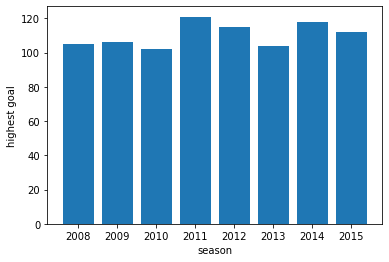

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel("season")
plt.ylabel("highest goal")
plt.bar(num_goal_highest.season_start, num_goal_highest.total_num_goal, label = num_goal_highest.team_name)

# Analysis

hypothesis: 

# Insight